# ESTUDIO CÉLULA DURANTE UN DÍA 

In [26]:
import module_Cell as cell
import module_AoiGrids as gr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [27]:
caracteristics_module={    
    'tilt':20,
    'surface_azimuth':180,
    'radius':0.6,
    'area':179*10**-6
    }

In [28]:
caracteristics={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Europe/Madrid',
    'date':'2021-12-21',
    }

### ESTUDIAMOS LAS FUNCIONES PARA CADA AOI RESPECTO EL DESPLAZAMIENTO Y LAS GUARDAMOS EN FORMA DE FUNCIÓN

In [29]:
desp=np.arange(0, 3, 0.01)

In [30]:
f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60=cell.function(desp,caracteristics_module['radius'])

In [31]:
data_location=gr.get_data_location(caracteristics,caracteristics_module,caracteristics['date']) 

### ESTUDIO CÉLULA TODO GENERACIÓN FOTOVOLTAICA

Se asume que todo la irradiación se usa para generación fotovoltaica y asumimos un día ideal sin nubes

In [32]:
illum_module_DIFF=cell.from_irrad_to_ilum(data_location['POA_diffuse'],caracteristics_module['area'])

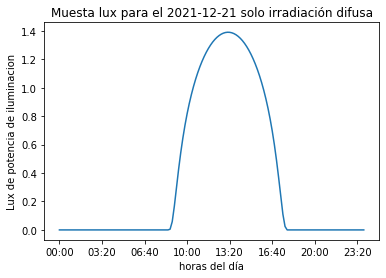

In [33]:
illum_module_DIFF.plot(label='iluminación modulo ')

plt.xlabel('horas del día')
plt.ylabel('Lux de potencia de iluminacion')
plt.title("Muesta lux para el "+ caracteristics['date']+" solo irradiación difusa")

plt.show()

Podemos ver, que depende mucho de la hora del día. Podemos llegar a obtener en cada moduo 17.5 lux, que son 45lumen. 

### ESTUDIO PARA LA CÉLULA SIN MOVER

In [34]:
illum_module=[]

for i in range(len(data_location['AOI'])):
    irrad_distribution=cell.irrad(0,data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*data_location['POA_direct'][i]
    illum_module.append(cell.from_irrad_to_ilum(float(irrad_distribution),caracteristics_module['area']))
    
illum_module=illum_module+cell.from_irrad_to_ilum(data_location['POA_diffuse'],caracteristics_module['area'])


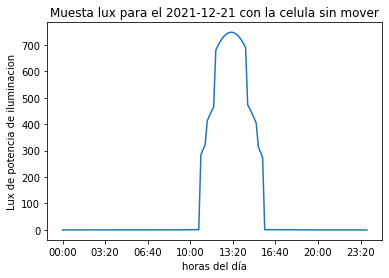

In [35]:
illum_module.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('Lux de potencia de iluminacion')
plt.title("Muesta lux para el "+ caracteristics['date']+ " con la celula sin mover")

plt.show()

Obtenemos una potencia de iluminación muy alta sin mover la célula. 

### ESTUDIO CÉLULA CON MOVIMIENTO

Suponemos un caso: una sala de espera de hospital, donde se requieren 200 lux. Sabiendo que podemos conseguir hasta 10 000 lux con cada celula, podemos utilizar la gran mayoría para generación fotovoltaica. Dependiendo de las dimensiones de la habitación, buscando homogeneidad, se buscará poner más focos o menos.

In [51]:
illum_goal=300
illum_module_=[]
desp_cell_=[]
for i in range(len(data_location['AOI'])):
    desp,illum=cell.adjust(illum_goal,data_location['AOI'][i],caracteristics_module['area'],data_location['POA_direct'][i],data_location['POA_diffuse'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)
    illum_module_.append(illum)
    desp_cell_.append(desp)

illum_module=pd.Series(illum_module_)
illum_module.index=data_location['times'].index
desp_cell=pd.Series(desp_cell_)
desp_cell.index=data_location['times'].index

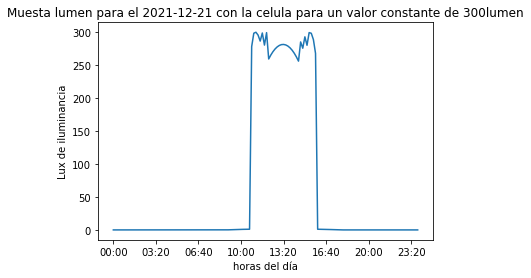

In [52]:

illum_module.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('Lux de iluminancia')
plt.title("Muesta lumen para el "+ caracteristics['date']+ " con la celula para un valor constante de "+str(illum_goal)+"lumen")
plt.show()

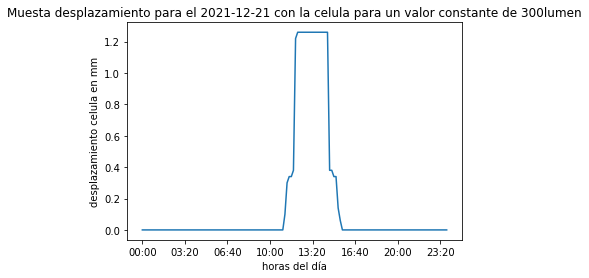

In [53]:
desp_cell.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('desplazamiento celula en mm')
plt.title("Muesta desplazamiento para el "+caracteristics['date']+" con la celula para un valor constante de "+str(illum_goal)+"lumen")

plt.show()

# ESTUDIO CÉLULA DURANTE UN AÑO: 2020

Usamos para todos los días del año esta misma 

In [54]:
date=np.array('2021-01-01', dtype=np.datetime64)
date= date + np.arange(365)

In [55]:
illum_module_year_=[]
Index=[]
for day in date:
    data_location=gr.get_data_location(caracteristics,caracteristics_module,day) 
    for i in range(len(data_location['AOI'])):
        irrad_distribution=cell.irrad(desp_cell[i],data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*data_location['POA_direct'][i]
        illum_module_year_.append(cell.from_irrad_to_ilum(float(irrad_distribution),caracteristics_module['area'])+cell.from_irrad_to_ilum(data_location['POA_diffuse'][i],caracteristics_module['area']))
        Index.append(data_location['times'][i])
    

illum_module_year=pd.Series(illum_module_year_)
illum_module_year.index=Index

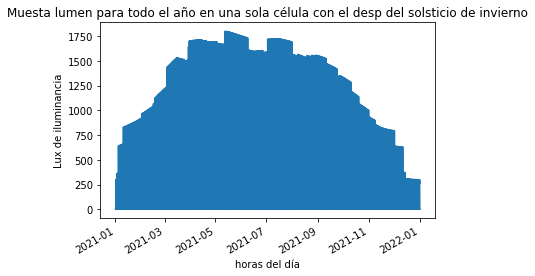

In [56]:
illum_module_year.plot()
plt.xlabel('horas del día')
plt.ylabel('Lux de iluminancia')
plt.title("Muesta lumen para todo el año en una sola célula con el desp del solsticio de invierno")
plt.show()

## ESTUDIO  REAL UNA HABITACION SEGUN NORMATIVAS

Solo irradiancia difusa

In [57]:
illum_module_year_=[]
Index=[]
for day in date:
    data_location=gr.get_data_location(caracteristics,caracteristics_module,day) 
    for i in range(len(data_location['AOI'])):
        irrad_distribution=cell.irrad(0,data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*data_location['POA_direct'][i]
        illum_module_year_.append(cell.from_irrad_to_ilum(float(irrad_distribution),caracteristics_module['area'])+cell.from_irrad_to_ilum(data_location['POA_diffuse'][i],caracteristics_module['area']))
        Index.append(data_location['times'][i])
    

illum_module_year=pd.Series(illum_module_year_)
illum_module_year.index=Index

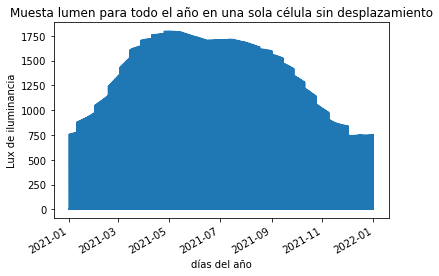

In [58]:
illum_module_year.plot()
plt.xlabel('días del año')
plt.ylabel('Lux de iluminancia')
plt.title("Muesta lumen para todo el año en una sola célula sin desplazamiento")
plt.show()

In [59]:
illum_goal=300
illum_module_=[]
desp_cell_=[]
Index=[]
for day in date:
    data_location=gr.get_data_location(caracteristics,caracteristics_module,day) 
    for i in range(len(data_location['AOI'])):
        desp,illum=cell.adjust(illum_goal,data_location['AOI'][i],caracteristics_module['area'],data_location['POA_direct'][i],data_location['POA_diffuse'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)
        illum_module_.append(illum)
        desp_cell_.append(desp)
        Index.append(data_location['times'][i])
    
illum_module=pd.Series(illum_module_)
illum_module.index=Index
desp_cell=pd.Series(desp_cell_)
desp_cell.index=Index

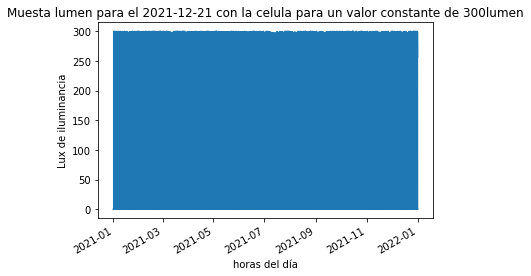

In [60]:
illum_module.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('Lux de iluminancia')
plt.title("Muesta lumen para el "+ caracteristics['date']+ " con la celula para un valor constante de "+str(illum_goal)+"lumen")
plt.show()

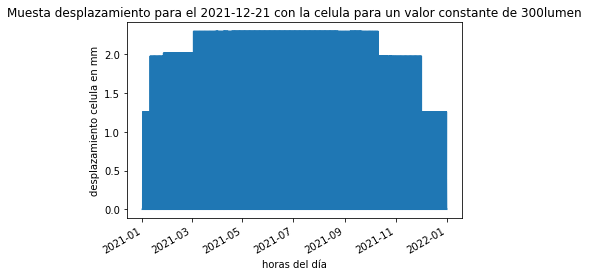

In [61]:
desp_cell.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('desplazamiento celula en mm')
plt.title("Muesta desplazamiento para el "+caracteristics['date']+" con la celula para un valor constante de "+str(illum_goal)+"lumen")

plt.show()

# ILUMINACIÓN DE UNA ZONA

Delimitar en 1600 lux, supone que, dependiendo de los metros cuadrados, tengamos una luminosidasd (lumen) u otra. 
Las normativas, nos limitan los valores en lux. Pudiendo ir de potencia lumínicas bajas de 300 lux en zonas de paso o de 1000 lux en zonas de estudio o análisis. 

Debido a la magnitud de lux que se obtienen, lo más logico va a ser utilizar prácticamente todos los CPV para generación fotovoltaica y dos o tres utilizarlos como iluminaria. 

In [47]:
caracteristics_room={    
    'area_m2':61,
    'area_cpv_m2':41.25,
    'lux_requeridos':200,    
    'nombre':'sala de espera',
    }

### Calculo del numero de CPV

In [48]:
n_CPV=int(caracteristics_room['area_cpv_m2']/caracteristics_module['area'])
print(n_CPV)

230446


In [49]:
lumen_requeridos=caracteristics_room['lux_requeridos']/caracteristics_room['area_m2']
print(lumen_requeridos)

3.278688524590164


In [50]:
lux_iluminaria=lumen_requeridos/caracteristics_room['area_cpv_m2']
print(lux_iluminaria)

0.07948335817188276
